In [128]:
import pandas as pd
import numpy as np
import datetime
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [77]:
# read data
dt1 = pd.read_csv('uber-raw-data-apr14.csv')
dt2 = pd.read_csv('uber-raw-data-janjune-15.csv')

In [96]:
dt3 = pd.read_csv('uber-raw-data-sep14.csv')

In [99]:
dt3.iloc[0,0]

'9/1/2014 0:01:00'

In [71]:
dt1.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [72]:
dt2.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90


In [76]:
# datetime formats
fmt1 = '%m/%d/%Y %H:%M:%S'
fmt2 = '%Y-%m-%d %H:%M:%S'
# convert datetime in strings to timestamp
dt1['Date/Time'] = dt1['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, fmt1))
dt2['Pickup_date'] = dt2['Pickup_date'].apply(lambda x: datetime.datetime.strptime(x, fmt2))
dt3['Date/Time'] = dt1['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, fmt1))

In [100]:
dt3['Date/Time'] = dt3['Date/Time'].apply(lambda x: datetime.datetime.strptime(x, fmt1))

In [94]:
# save month list from datetime
dt2['month'] = dt2['Pickup_date'].apply(lambda x: x.month)
# pick 2015 June data from 2015 dataset
dt2 = dt2[dt2.month >= 6].drop('month', axis = 1)

In [125]:
blocks = gpd.read_file('../census/nycb2010_16d/nycb2010.shp')
tracts = gpd.read_file('../census/nyct2010_16d/nyct2010.shp')

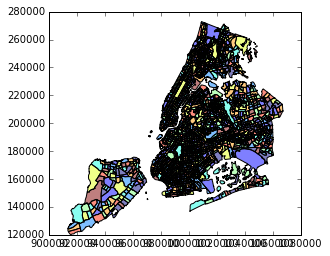

In [129]:
tracts.plot()


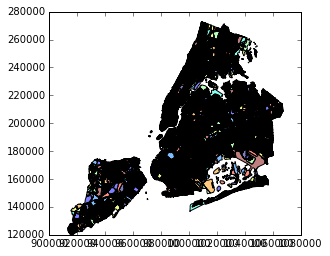

In [130]:
blocks.plot()